# **A6 - Regression Models, Model Fit and Prediction Errors**


Mitch Messier, September 27th, 2023

# Table of Contents

1. **Task I:** Set up, data import, data exploration
2. **Task II:** Data Correlation
3. **Task III:** Shuffle and model preparation
4. **Task IV:** Model Cross Validation
5. **Task V:** Feature Engineering – Attempt to improve the models by adding a log term of UserCount.
6. **Task VI:** Evaluate Feature Engineering

# Load Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import numpy as np

# **Task I:** Set up, data import, data exploration

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/NA_sales_filtered.csv', encoding = "latin-1")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          6345 non-null   object 
 1   Platform      6345 non-null   object 
 2   Genre         6345 non-null   object 
 3   Rating        6345 non-null   object 
 4   Critic_Score  6345 non-null   int64  
 5   Critic_Count  6345 non-null   int64  
 6   User_Score    6345 non-null   int64  
 7   User_Count    6345 non-null   int64  
 8   NA_Sales      6345 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 446.3+ KB


In [ ]:
data.describe()

,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales
count,6345.000000,6345.000000,6345.000000,6345.000000,6345.000000
mean,69.819385,28.966745,70.765485,152.730969,0.354230
std,13.945811,19.098594,14.438432,545.962483,0.494404
min,13.000000,3.000000,5.000000,4.000000,0.010000
25%,61.000000,14.000000,64.000000,10.000000,0.080000
50%,72.000000,25.000000,74.000000,24.000000,0.170000
75%,80.000000,40.000000,81.000000,77.000000,0.410000
max,98.000000,113.000000,95.000000,10665.000000,3.490000


In [ ]:
data.head()

,Name,Platform,Genre,Rating,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales
0,Final Fantasy VII,PS,Role-Playing,T,92,20,91,1282,3.01
1,Final Fantasy X,PS2,Role-Playing,T,92,53,86,1056,2.91
2,The Sims 3,PC,Simulation,T,86,75,75,886,0.99
3,Final Fantasy VIII,PS,Role-Playing,T,90,24,85,644,2.28
4,Tekken 3,PS,Fighting,T,96,15,90,367,3.27


In [ ]:
data = data.drop('Name', axis=1)

In [ ]:
data.columns

Index(['Platform', 'Genre', 'Rating', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'NA_Sales'],
      dtype='object')

# **Task II:** Data Correlation

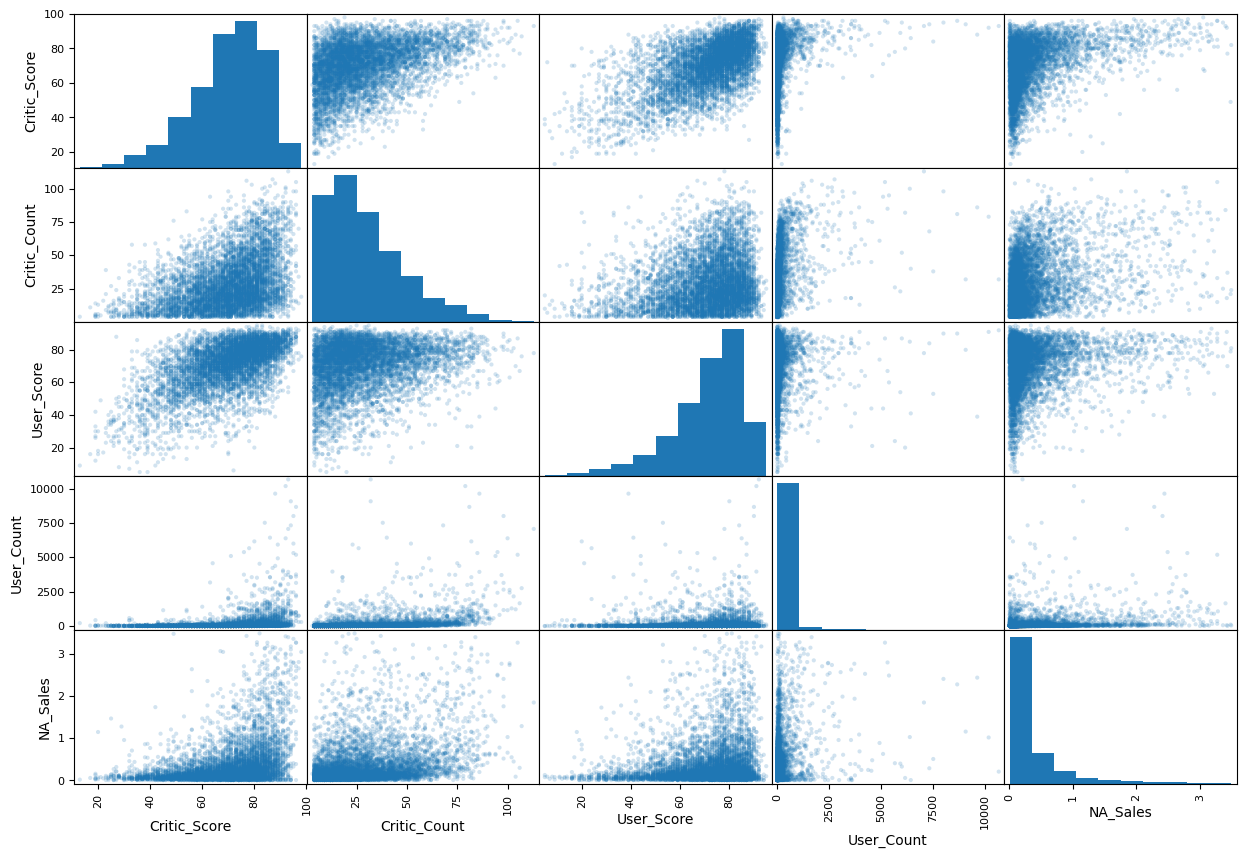

In [ ]:
pd.plotting.scatter_matrix(data,figsize = (15,10), alpha = 0.2)
plt.show()

In [ ]:
sales_corr = data.corr()
sales_corr

<ipython-input-95-584bdc9b944e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales_corr = data.corr()


,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales
Critic_Score,1.000000,0.390399,0.584548,0.243688,0.352974
Critic_Count,0.390399,1.000000,0.192762,0.348060,0.343505
User_Score,0.584548,0.192762,1.000000,0.012398,0.145351
User_Count,0.243688,0.348060,0.012398,1.000000,0.268393
NA_Sales,0.352974,0.343505,0.145351,0.268393,1.000000


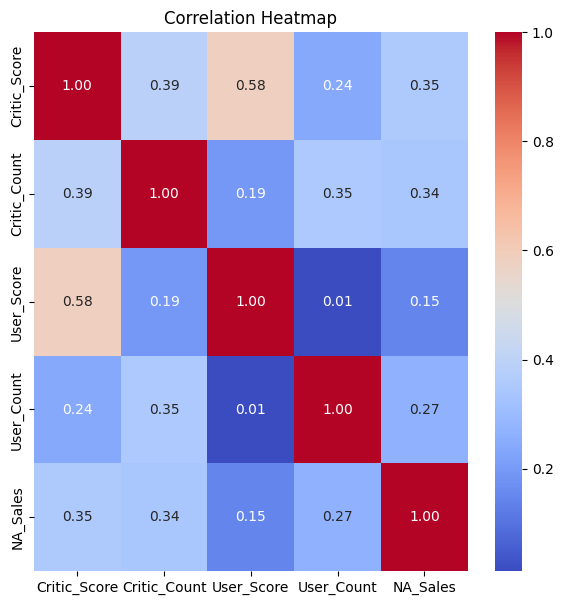

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(sales_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The two columns with the strongest positive correlation was User_Score and Critic_Score. However, there are no negative corrlations within this dataset. On the other hand, the weakest correlation is User_Count and User_Score.

# **Task III:** Shuffle and model preparation

In [ ]:
data = shuffle(data)

In [ ]:
` `   encoded_data = pd.get_dummies(data, drop_first=True)

In [ ]:
y_target = encoded_data.pop('NA_Sales')

In [ ]:
scoring_list = ['neg_mean_absolute_error','neg_mean_absolute_percentage_error','neg_mean_squared_error','r2']

# **Task IV:** Model Cross Validation

In [ ]:
scores = cross_validate(
    LinearRegression(),
    encoded_data,
    y_target,
    cv=5,
    scoring= scoring_list,
    return_train_score=True)

scores_df = pd.DataFrame(scores)
scores_df.mean()

fit_time                                    0.034020
score_time                                  0.010483
test_neg_mean_absolute_error               -0.270647
train_neg_mean_absolute_error              -0.269086
test_neg_mean_absolute_percentage_error    -2.557213
train_neg_mean_absolute_percentage_error   -2.543586
test_neg_mean_squared_error                -0.178987
train_neg_mean_squared_error               -0.175975
test_r2                                     0.265508
train_r2                                    0.279824
dtype: float64

In [ ]:
regression_tree = DecisionTreeRegressor(random_state=42, max_leaf_nodes=8)

In [ ]:
scores = cross_validate(
    regression_tree,
    encoded_data,
    y_target,
    cv=5,
    scoring= scoring_list,
    return_train_score=True)

scores_df = pd.DataFrame(scores)
scores_df.mean()

fit_time                                    0.024682
score_time                                  0.004739
test_neg_mean_absolute_error               -0.266133
train_neg_mean_absolute_error              -0.260908
test_neg_mean_absolute_percentage_error    -2.630562
train_neg_mean_absolute_percentage_error   -2.599992
test_neg_mean_squared_error                -0.182624
train_neg_mean_squared_error               -0.171870
test_r2                                     0.248403
train_r2                                    0.296866
dtype: float64

Maximum MAPE: -2.55

Within our model, we notice that in our training set our MAPE is -2.55 or 255%. On the other hand, within our test set we have a value of -2.54 or 254%. Both of these values mean that the model predictions are 255 times larger in the training set and 254 times larger in our testing set. We need to conduct furhtur investigation into our model so we can reduce these large model errors.

# **Task V:** Feature Engineering – Attempt to improve the models by adding a log term of UserCount.

In [ ]:
encoded_data_copy = encoded_data.copy()

In [ ]:
encoded_data_copy['UserCount_Log'] = np.log(encoded_data_copy['User_Count'])

# **Task VI:** Evaluate Feature Engineering

In [ ]:
scores = cross_validate(
    LinearRegression(),
    encoded_data_copy,
    y_target,
    cv=5,
    scoring= scoring_list,
    return_train_score=True)

scores_df = pd.DataFrame(scores)
scores_df.mean()

fit_time                                    0.044239
score_time                                  0.015249
test_neg_mean_absolute_error               -0.255847
train_neg_mean_absolute_error              -0.253586
test_neg_mean_absolute_percentage_error    -2.524090
train_neg_mean_absolute_percentage_error   -2.497227
test_neg_mean_squared_error                -0.157547
train_neg_mean_squared_error               -0.154376
test_r2                                     0.353042
train_r2                                    0.368199
dtype: float64

In [ ]:
scores = cross_validate(
    regression_tree,
    encoded_data_copy,
    y_target,
    cv=5,
    scoring= scoring_list,
    return_train_score=True)

scores_df = pd.DataFrame(scores)
scores_df.mean()

fit_time                                    0.026208
score_time                                  0.006293
test_neg_mean_absolute_error               -0.266133
train_neg_mean_absolute_error              -0.260908
test_neg_mean_absolute_percentage_error    -2.630562
train_neg_mean_absolute_percentage_error   -2.599992
test_neg_mean_squared_error                -0.182624
train_neg_mean_squared_error               -0.171870
test_r2                                     0.248403
train_r2                                    0.296866
dtype: float64

The performance comparison between the first and second sets of models reveals that the addition of a log transformation to the UserCount column in the second set has led to improvements in predictive accuracy. The second set of models exhibits lower mean absolute error, mean squared error, and higher R-squared scores, suggesting a better fit to the data and enhanced predictive performance. However, this improvement comes at the cost of increased computational time, as indicated by longer training and scoring times in the second set. The log transformation likely helped in handling the data more effectively, potentially reducing the impact of outliers and non-linearities, which led to improved model performance across various evaluation metrics.

# Convert to HTML

In [ ]:
# Insert a code cell to include to following line of command in each
# Colab notebook to access data files saved in Google Drive of your account
# Retrieve csv file from google drive by mapping the folder from google drive.
# Must be done each time session expires.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# copy the ipynb to the local working directory
# This file name must change to be the name of your Lab file!
!cp "/content/drive/MyDrive/Colab Notebooks/A6_Messier_Mitch.ipynb" ./

# create html from ipynb
!jupyter nbconvert --to html "A6_Messier_Mitch.ipynb"

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/A6_Messier_Mitch.ipynb': No such file or directory
[NbConvertApp] WARNING | pattern 'A6_Messier_Mitch.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    A